In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [4]:
df = pd.read_csv(r'C:\Users\KIRAN\Downloads\spam.csv', encoding='latin-1')[['v1', 'v2']]

In [5]:
df.columns = ['label', 'text']
df['label'] = df['label'].replace({'ham': 0, 'spam': 1})
print(df.head())

   label                                               text
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


C:\Users\KIRAN\AppData\Local\Temp\ipykernel_22516\2998222002.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['label'] = df['label'].replace({'ham': 0, 'spam': 1})


In [6]:
df['text_length'] = df['text'].apply(len)
df['num_words' ] = df['text'].apply(lambda x: len(x.split()))
df['num_digits'] = df['text'].apply(lambda x: sum(c.isdigit() for c in x))

In [7]:
X = df[['text_length','num_words','num_digits']]
y = df['label']

In [10]:
vectorizer = CountVectorizer(stop_words='english')
X_counts = vectorizer.fit_transform(df['text'])

In [12]:
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf,df['label'], test_size=0.3, random_state=42)

In [15]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [16]:
y_pred_mnb = mnb.predict(X_test)

In [17]:
accuracy_score(y_test, y_pred_mnb)

0.9677033492822966

In [19]:
cm = confusion_matrix(y_test, y_pred_mnb)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[1453    0]
 [  54  165]]


Text(0.5, 23.52222222222222, 'Predicted')

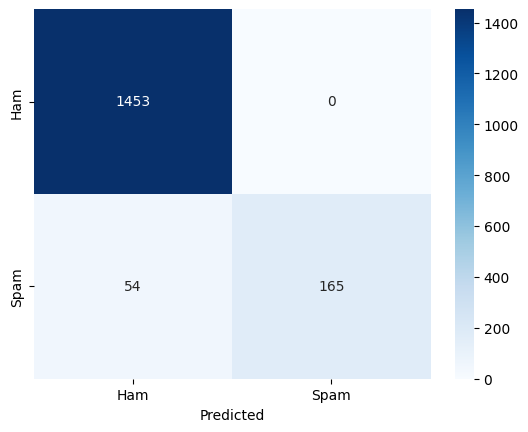

In [20]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')